# CMPT 732 - Fall 2022
# PyTorch tutorial - Part II

__content creator:__ Aryan Mikaeili

# Setting up Colab

1. Opening the notebook
2. Changing runtime type to GPU


# Installing PyTorch

Go to https://pytorch.org/. There you can find instructions on how to install PyTorch based on your machine. If using Lab machines, no need to install PyTorch.

# Tensors

Four important attributes:
1. Data
2. Type
3. Device
4. Requires Grad

In [1]:
import torch
import numpy as np

In [2]:
#defining an empty tensor and observing the default attributes
t = torch.tensor([1, 2, 3])

print('type:', type(t))
print('dtype:', t.dtype)
print('device:', t.device)
print('requires grad:', t.requires_grad)


type: <class 'torch.Tensor'>
dtype: torch.int64
device: cpu
requires grad: False


In [3]:
#defining an arbitrary tensor

t = torch.tensor(np.array([1, 2, 3]), dtype=torch.float64, device='cuda:0',requires_grad=True)

print('type:', type(t))
print('dtype:', t.dtype)
print('device:', t.device)
print('requires grad:', t.requires_grad)

type: <class 'torch.Tensor'>
dtype: torch.float64
device: cuda:0
requires grad: True


#Controlling devices in PyTorch


In [ ]:
t1 = torch.tensor([], device = torch.device('cpu'))

print('t1 device:', t1.device)

t2 = t1.cuda()
print('t2 device:', t2.device)

t3 = t1.cpu()
print('t3 device:', t1.device)





In [ ]:
device = torch.device('cuda:0')

t = torch.tensor([])

t1 = t.to(device)

print('t1 device:', t1.device)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())
print('device:', device)


#Accessing an item in PyTorch

In [ ]:
import numpy as np

t = torch.tensor([1, 2, 3])
print(t[1])

n = np.array([1, 2, 3])
print(n[1])


In [ ]:
print(t[1].item())

#Converting tensors to and from numpy arrays

In [ ]:
t = torch.tensor([1, 2, 3])
n = t.numpy()

print('n:',n)
tn = torch.from_numpy(n)
print('tn:',tn)



# Important operations on tensors

In [ ]:
#unsqueeze
t = torch.tensor([1, 2, 3])

t_u = torch.unsqueeze(t, 0)
print('t shape:', t.shape)
print('t_u shape:', t_u.shape)

In [ ]:
#cat
a = torch.randn((8, 3))
b = torch.randn((4, 3))

c = torch.cat([a, b], dim = 0)

print(c.shape)

In [ ]:
#permute
a = torch.randn((4, 100, 200, 3))

a_perm = a.permute((0, 3, 1, 2))

print(a_perm.shape)


In [ ]:
#matrix multiplication

a = torch.randn(4, 3)
b = torch.randn(3, 5)

ab_mult = a @ b
print(ab_mult.shape)

In [4]:
#batch matrix multiplication

#first matrix of a with first matrix of b...etc
a = torch.randn(100, 4, 3)
b = torch.randn(100, 3, 5)

ab_mult = torch.bmm(a, b)
print(ab_mult.shape)

torch.Size([100, 4, 5])


In [5]:
#inplace operations

a = torch.tensor([1,2,3])
b = torch.tensor([1,1,1])

a.add_(b)
print(a)


tensor([2, 3, 4])


# Autograd Package

In [21]:
N, D = 3, 4

x = torch.randn(N, D, requires_grad=True)
y = torch.randn(N, D)
z = torch.randn(N, D)




In [25]:
a = x * y
b = a + z
c = b.sum()



In [27]:
#backward
c.backward()



In [24]:
print(x.grad)

tensor([[ 0.8489, -0.7099,  0.1713,  2.2946],
        [ 1.4580, -1.0724, -0.6499,  0.7811],
        [-0.4213,  1.9927, -0.4512,  0.9330]])


In [30]:
print(x.grad)
x.grad.zero_()

tensor([[ 1.6977, -1.4197,  0.3425,  4.5893],
        [ 2.9159, -2.1447, -1.2997,  1.5622],
        [-0.8426,  3.9854, -0.9024,  1.8659]])


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
#computation graph and the backward method

In [ ]:
#accumulation of gradients in the backward method

# the NN module

In [31]:
import torch.nn as nn

l = nn.Linear(in_features = 1000, out_features = 100, bias = True)

x = torch.randn(64, 1000)

output = l(x)

print('shape of output:', output.shape)


shape of output: torch.Size([64, 100])


In [32]:
print('weight shape:',l.weight.shape)
print('bias shape:',l.bias.shape)
print('type of weight', type(l.weight))

weight shape: torch.Size([100, 1000])
bias shape: torch.Size([100])
type of weight <class 'torch.nn.parameter.Parameter'>


In [37]:
conv2d = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
image = torch.randn(100,100,3)

#order has to be (B,C,H,W)

#(100,100,3) -> (1,100,100,3) -> (1,3,100,100)
image = image.unsqueeze(0).permute(0,3,1,2)
op = conv2d(image)
print(op)


tensor([[[[-4.8692e-01, -6.0773e-02, -1.7058e-01,  ...,  5.6228e-01,
           -2.0895e-01, -2.9896e-01],
          [ 4.6451e-03,  1.0638e+00, -1.2035e+00,  ...,  1.1303e+00,
            4.1514e-03, -8.5037e-01],
          [ 4.7579e-01,  5.6744e-01,  8.6891e-01,  ...,  2.7412e-01,
            5.7233e-01, -2.8930e-01],
          ...,
          [-5.9055e-01, -3.2022e-01, -2.9450e-01,  ...,  9.7831e-01,
           -8.0967e-02, -5.2043e-01],
          [ 2.8282e-01,  1.5367e-01, -1.2627e+00,  ...,  4.1111e-01,
           -5.2457e-01, -5.3332e-01],
          [ 1.2561e-01,  3.1592e-01, -1.4515e-01,  ...,  1.3853e-01,
           -3.2926e-01, -6.6396e-01]],

         [[-3.0060e-02, -3.0833e-01,  5.4138e-01,  ..., -2.2741e-01,
            2.2982e-01,  2.4513e-01],
          [-1.9447e-01,  2.7756e-01,  3.8390e-01,  ...,  5.2333e-02,
            1.4099e+00,  3.7229e-02],
          [ 1.0430e+00, -4.4227e-01,  4.7745e-01,  ...,  5.5559e-01,
           -1.6887e-01,  3.7865e-02],
          ...,
     

In [33]:
conv2d = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
image = torch.randn(100, 100, 3)

image = torch.unsqueeze(image, 0)
print('image shape 1:', image.shape)

image = image.permute(0, 3, 1, 2)
print('image shape 2:',image.shape)

output = conv2d(image)

print('output shape:',output.shape)

print('weights shape:', conv2d.weight.shape)



image shape 1: torch.Size([1, 100, 100, 3])
image shape 2: torch.Size([1, 3, 100, 100])
output shape: torch.Size([1, 64, 96, 96])
weights shape: torch.Size([64, 3, 5, 5])


In [34]:
conv2d = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
image = torch.randn(100, 100, 3)


image = torch.unsqueeze(image, 0)
print('image shape 1:', image.shape)


image = image.permute(0, 3, 1, 2)
print('image shape 2:',image.shape)

output = conv2d(image)

print('output shape:',output.shape)

image shape 1: torch.Size([1, 100, 100, 3])
image shape 2: torch.Size([1, 3, 100, 100])
output shape: torch.Size([1, 64, 96, 96])


In [35]:
print(conv2d.weight.shape)

torch.Size([64, 3, 5, 5])


In [ ]:
##optim package



In [42]:
#models


class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.linear1 = nn.Linear(3, 64, bias = True)
    self.linear2 = nn.Linear(64, 64, bias = True)
    self.relu = nn.ReLU()
    self.mpool = nn.MaxPool2d(3, stride=2)

##define forward function
  def forward(self,x):
    out = self.linear1(x)
    out = self.linear2(x)
    out = self.relu(x)

##call an obj

model = MyModel().to(torch.device("cuda"))

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr = 1e-3)
optimizer.step()
optimizer.zero_grad()

##


# Datasets, Dataloaders and Torchvision transforms

In [43]:
#transforms

#download image
import requests
import shutil
from PIL import Image

image_url = 'https://upload.wikimedia.org/wikipedia/commons/6/6a/Johann_Sebastian_Bach.jpg'
response = requests.get(image_url, stream=True)
with open('bach.jpg', 'wb') as f:
  shutil.copyfileobj(response.raw, f)

image = Image.open('bach.jpg')


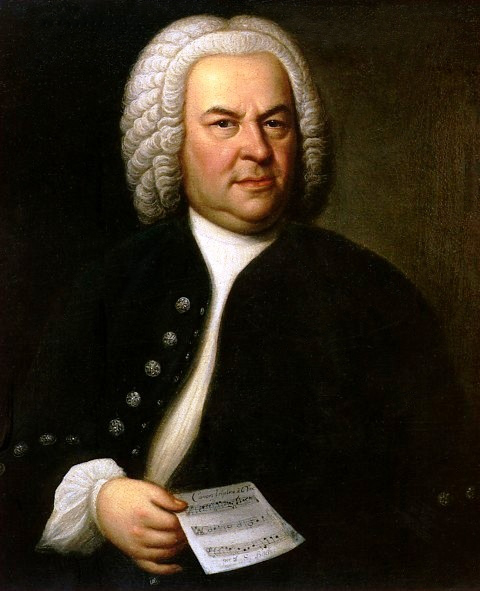

In [46]:
image

In [44]:
#transfer to tensor
from torchvision import transforms

image_tensor = transforms.ToTensor()(image)
print(type(image), type(image_tensor))
print(image_tensor.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'torch.Tensor'>
torch.Size([3, 591, 480])


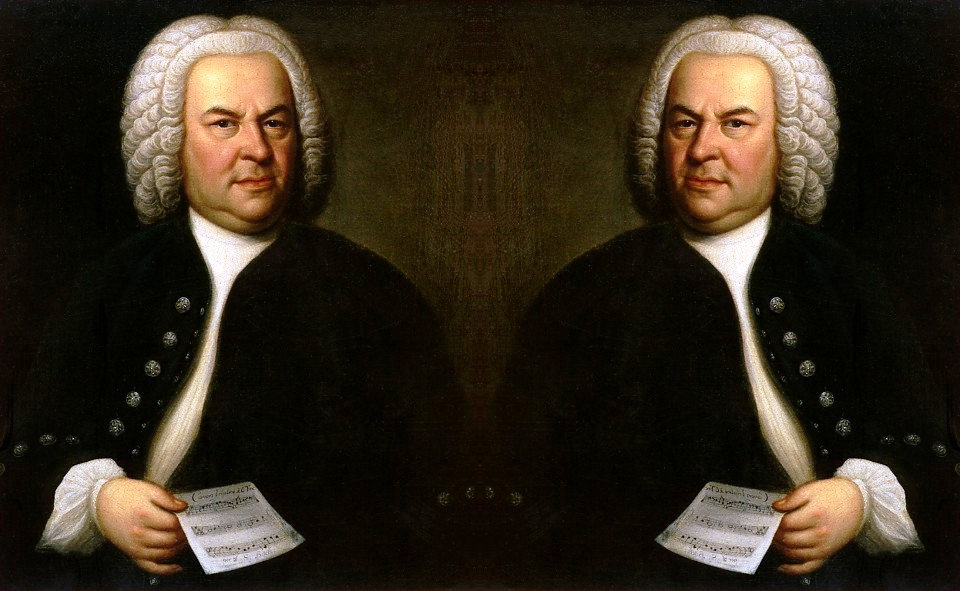

In [45]:
#Horizontal flip

hflip_image = transforms.RandomHorizontalFlip(1)(image)
Image.fromarray(np.hstack([np.array(image), np.array(hflip_image)]))

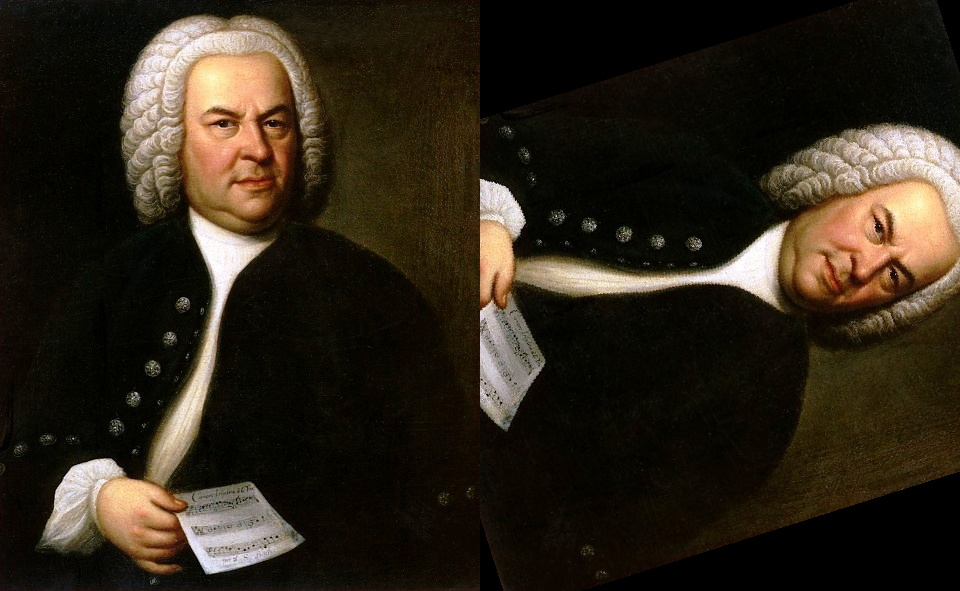

In [53]:
#Rotate image

rotate_image = transforms.RandomRotation(80)(image)
Image.fromarray(np.hstack([np.array(image), np.array(rotate_image)]))


In [ ]:
#Normalize


In [ ]:
#Available datasets
from torchvision import transforms
from torchvision import datasets

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

b_size = 4

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=b_size,
                                           shuffle=True, num_workers=0)




Files already downloaded and verified


In [ ]:
import matplotlib.pyplot as plt

image, label = trainset.__getitem__(1)
image = image.permute(1, 2, 0).numpy()

image = ((image + 1) * 127.5).astype('uint8')
plt.imshow(image)
plt.show()




In [ ]:
for i, data in enumerate(trainloader):
  images, labels = data
  print(i, images.shape, labels.shape)

In [ ]:
#arbitrary dataset
import torch
images = torch.randn(100, 3, 32, 32)
labels = torch.randint(10, (100,))



from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class my_data(Dataset):
  def __init__(self, images, labels):
    super().__init__()
    self.images = images
    self.labels = labels

  def __getitem__(self, idx):

    return self.images[idx], self.labels[idx]

  def __len__(self):
    return self.images.shape[0]


dataset = my_data(images, labels)
dataloader = DataLoader(dataset, batch_size = 8, shuffle=True, drop_last=True)


for i, data in enumerate(dataloader):
  images, labels = data
  print(i, images.shape, labels.shape)

# Exercise

Cifar10 classifier with the following structure (see the attached framework):

__two Convolutional blocks__
1. 2D convolution layer: 3 channels (first block) 16 channels (second block) to 16 channels with kernel size 5
2. ReLU activation
3. 2D max pooling layer

__Flatten__

1. Linear layer with appropriate number of input nodes and 128 output nodes + ReLU
2. Linear layer with 128 input nodes and 64 output nodes + ReLU
3. Linear Layer with 64 input nodes and 10 output nodes


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from torchvision import datasets

class 
conv2d_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5)
conv2d_2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5)



